# Домашнее задание 1. Сбор данных

При решении реальных задач мы почти никогда не имеем дело с "хорошими" исходными данными, уже подготовленными для обработки и анализа. Как правило на входе имеются неструкткрированные данные в "грязном" виде, например необработанные тексты, изображения или аудио файлы. Иногда нет даже этого, и данные приходится собирать из разных доступных источников: разнообразных баз данных, внешних сервисов и даже электронных таблиц. После того, как данные получены, их унифицируют, очищают от шума, преобразовывают в нужный вид и сохраняют для дальнейшего анализа. В одном из традиционных подходов к Data Mining этот процесс называется Extract-Transform-Load

In [4]:
!pip install -r requirements.txt

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\SeR\AppData\Local\pip\Cache\wheels\cb\c8\67\83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


In [1]:
import vk
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from math import radians, cos, sin, asin, sqrt, pi
import time
%matplotlib inline

Нам потребуется загрузить информацию о местах, в которых совершаются чекины, иначе говоря провести сбор данных (data collection). [Ссылка на ВК для разработчиков](https://vk.com/dev)

Для того, чтобы получить доступ к API прежде всего необходимо зарегистрироваться в VK в качестве разработчика и создать свое [приложение](https://vk.com/apps?act=manage). После создания приложения будет доступен набор ключей, которые мы будем использовать для аутентификации. Далее вам потребуется создать токен авторизации, чтобы получать доступ к API. Этот токен необходимо скопировать в соответствующие константы ниже. Подробнее о том, как работает аутентификация в VK API можно почитать [по ссылке](https://vk.com/dev/first_guide), хотя это нужно скорее для ознакомления: библиотека обращения с API позаботится о механизме аутентификации за нас.

Получить токен можно по этой ссылке: https://oauth.vk.com/authorize?client_id=5910860&&response_type=token&display=page&redirect_uri=https://oauth.vk.com/blank.html

In [6]:
ACCESS_TOKEN = "7da4b9417e2b0b7402ffb0a271ed55db0d95060c8c7e424761362736e1f62b4289d47ee213abf874b32d1"
token = ACCESS_TOKEN
session = vk.Session(access_token=token)
vkapi = vk.API(session=session)

VK API может отдавать вам посещаемые места несколькими способами: в некотором радиусе от точки или же по id самого места. Мы будем пользоваться [вторым способом](https://vk.com/dev/places.getById) . Требуется написать функцию, которая на вход получает объект подключения к API и индекс, до какого объекта требуется запросить. Возвращать она будет pandas.DataFrame с полученными данными.

In [7]:
query_size = 1000
max_in_sec = 3
delay_secs = 1

In [8]:
def get_place_info(vkapi, idx=5000):
    if idx < query_size:
        return pd.DataFrame(vkapi.places.getById(places=range(1,idx+1)))
    else:
        answer = vkapi.places.getById(places=range(1,query_size+1))
        l = range(query_size+1,idx+1)
        iteration = 1
        for i in xrange(0, len(l), query_size):
            if not iteration%max_in_sec:
                time.sleep(delay_secs)
            answer += vkapi.places.getById(places=l[i:i + query_size])
            iteration += 1
        return pd.DataFrame(answer)

In [9]:
places = get_place_info(vkapi, 5000)
places.shape

(5000, 12)

In [10]:
places.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,38,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.488720e+09


Предположим, что мы хотим понять несколько фактов о выборке объектов с id от 1 до 5000.
Помогите нам это сделать.
А вот и сами факты:
1. Провизуализируйте на карте все объекты которые находятся в Москве? Где больше объектов, в центре или на окраине?
2. Посчитайте количество объектов разного типа. Постройте распределение? Объектов какого типа больше в данной выборке?
3. Посчитайте распределение числа чекинов по всей выборке. Визуализируйте его.
4. Постройте box plot по числу чекинов для каждого типа объектов.
5. Преобразуйте поле created в datetime. Как давно были созданы объекты? Сколько объектов существует больше года? 

Не забудьте сохранить данную выборку, в будущем она вам понадобится.

Сохраним датасет places в csv файл

In [11]:
places.to_csv('vk_places_first_5000.csv', encoding='utf-8')

## 1)

Центром Москвы будем считать внутренности садового кольца (точнее, окружности, приближающей садовое кольцо) + ещё 300 метров.

In [12]:
R = 6367
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945
garden_ring_radius = 15.6 / (2 * pi) + 0.3 # some eps for garden ring radius (300m)

In [13]:
def distance(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = R * c
    return km

def in_radius(point, center, radius):
    return distance(point[0], point[1], center[0], center[1]) <= radius

def is_mos_center(point):
    return in_radius(point, mos_center, garden_ring_radius)

Подготовим данные

In [14]:
# do not drop all Nan-containing rows, drop only rows with Nan values in column "city"
places_2 = places[np.isfinite(places['city'])]
# first, we filter by city specified in each data sample
places_moscow = places_2.loc[places_2['city'] == 1]
# second, we filter by coords
places_moscow = places_moscow[places_moscow.latitude.between(mos_min_lat, mos_max_lat) &
                   places_moscow.longitude.between(mos_min_lon, mos_max_lon)]
print "Объектов в Москве:", places_moscow.shape[0]

Объектов в Москве: 1654


Провизуализируем все объекты, находящиеся в Москве

In [15]:
moscow = folium.Map(location=mos_center, zoom_start=11, control_scale=True)
marker_cluster = MarkerCluster(locations=places_moscow[['latitude', 'longitude']].values)
marker_cluster.add_to(moscow)
moscow

Сравним количество объектов в Москве и на окраине

In [16]:
places_moscow_center = places_moscow[places_moscow.apply(lambda x: is_mos_center(x[['latitude', 'longitude']]), axis=1)]
places_moscow_outskirts = places_moscow[places_moscow.apply(lambda x: not is_mos_center(x[['latitude', 'longitude']]), axis=1)]
print "Объектов в центре:", places_moscow_center.shape[0]
print "Объектов на окраине:", places_moscow_outskirts.shape[0]

Объектов в центре: 624
Объектов на окраине: 1030


Как видно, объектов на окраине больше.

## 2)

Посчитаем количество объектов разного типа

In [17]:
types = places['type'].value_counts(dropna=False)
types

3    3704
4    1296
Name: type, dtype: int64

Как видно, всего 3704 объекта типа 3 (рестораны) и 1296 объектов типа 4 (клубы).

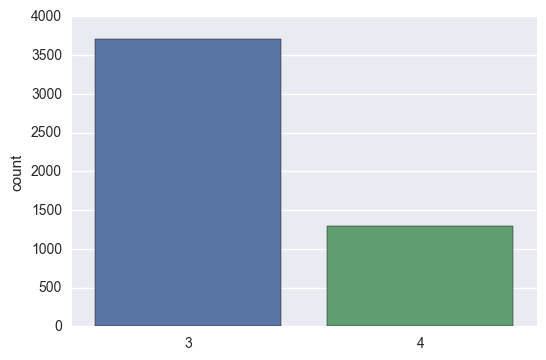

In [18]:
sns.countplot(places['type'].values)

Объектов типа 3 (ресторанов) больше в данной выборке.

## 3)

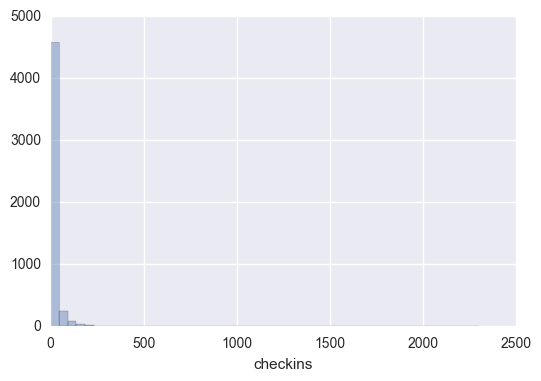

In [19]:
sns.distplot(places['checkins'], kde=False)

## 4)

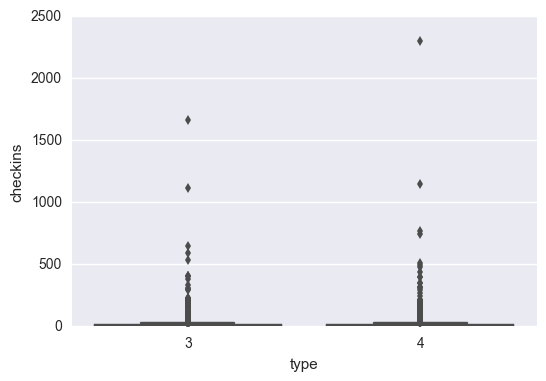

In [20]:
sns.boxplot(y=places['checkins'], x=places['type'])

## 5)

In [21]:
places.created = places.created.apply(lambda x: datetime.datetime.fromtimestamp(x))

In [22]:
places.iloc[0]

address                           Мячковский б-р 3а
checkins                                        435
city                                              1
country                                           1
created                         2010-08-02 12:39:01
icon         https://vk.com/images/places/clubs.png
latitude                                    55.6579
longitude                                   37.7516
pid                                               1
title                                   Baila Baila
type                                              4
updated                                 1.48752e+09
Name: 0, dtype: object

In [23]:
from dateutil.relativedelta import relativedelta
year_ago = datetime.datetime.now() - relativedelta(years=1)
_old_places = places[places.created < year_ago]
print "%d объектов существует больше года" % (_old_places.shape[0])

5000 объектов существует больше года
